In [1]:
# Author: Jack Desmond
# Date: 6/22/2019
# Visualize MLB stolen base data and analyze trends

# inmport packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read and clean data
df = pd.read_csv('/Users/jackdesmond/Downloads/baseballdatabank-2019-3.2/Teams.csv')
df.rename(columns={'W':'Wins','SB':'Stolen Bases'},inplace=True)
df.loc[:,'Stolen_Base_Attempts'] = df.loc[:,'Stolen Bases'].add(df.loc[:,'CS'])
df2 = df[df['yearID']>1969]

Text(-65, 130, 'Stolen bases for all teams since 1900 vs. their win totals')

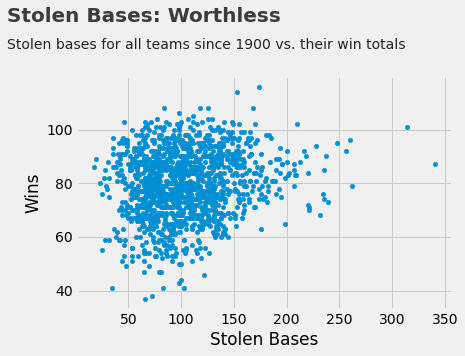

In [3]:
# plot each teams stolen bases total and win total 
plt.style.use('fivethirtyeight')
ax = df2.plot.scatter(x = 'Stolen Bases', y = 'Wins')
ax.text(x = -65, y = 140, s = "Stolen Bases: Worthless", fontsize = 20, weight = 'bold', alpha = .75)
ax.text(x = -65, y = 130, s = 'Stolen bases for all teams since 1900 vs. their win totals', fontsize = 14, alpha = .85)

In [4]:
# Calculate SBA per game

SBA_per_year = {}
games_per_year = {}

for i, row in df2.iterrows():
    Year = row['yearID']
    SBA = row['Stolen_Base_Attempts']
    games = row['G']
    if Year in SBA_per_year:
        SBA_per_year[Year] = SBA_per_year[Year] + SBA
        games_per_year[Year] = games_per_year[Year] + games
    else:
        SBA_per_year[Year] = SBA
        games_per_year[Year] = games

        
mlb_SBA_per_game = {}

for k, v in games_per_year.items():
    Year = k
    games = v
    SBA = SBA_per_year[Year]
    mlb_SBA_per_game[Year] = SBA / games

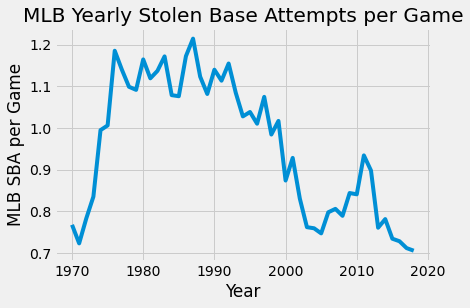

In [6]:
# Plot SBA per game
lists = sorted(mlb_SBA_per_game.items())
x, y = zip(*lists)

plt.plot(x, y)

plt.title('MLB Yearly Stolen Base Attempts per Game')
plt.xlabel('Year')
plt.ylabel('MLB SBA per Game')

plt.show()